In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')

In [4]:
dataset.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
dataset.shape

(149, 20)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
dataset.describe(include = 'all')

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
unique,149,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sri Lanka,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,NaN,NaN,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,NaN,NaN,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,NaN,NaN,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,NaN,NaN,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,NaN,NaN,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000


In [8]:
dataset.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

# Basic Displots

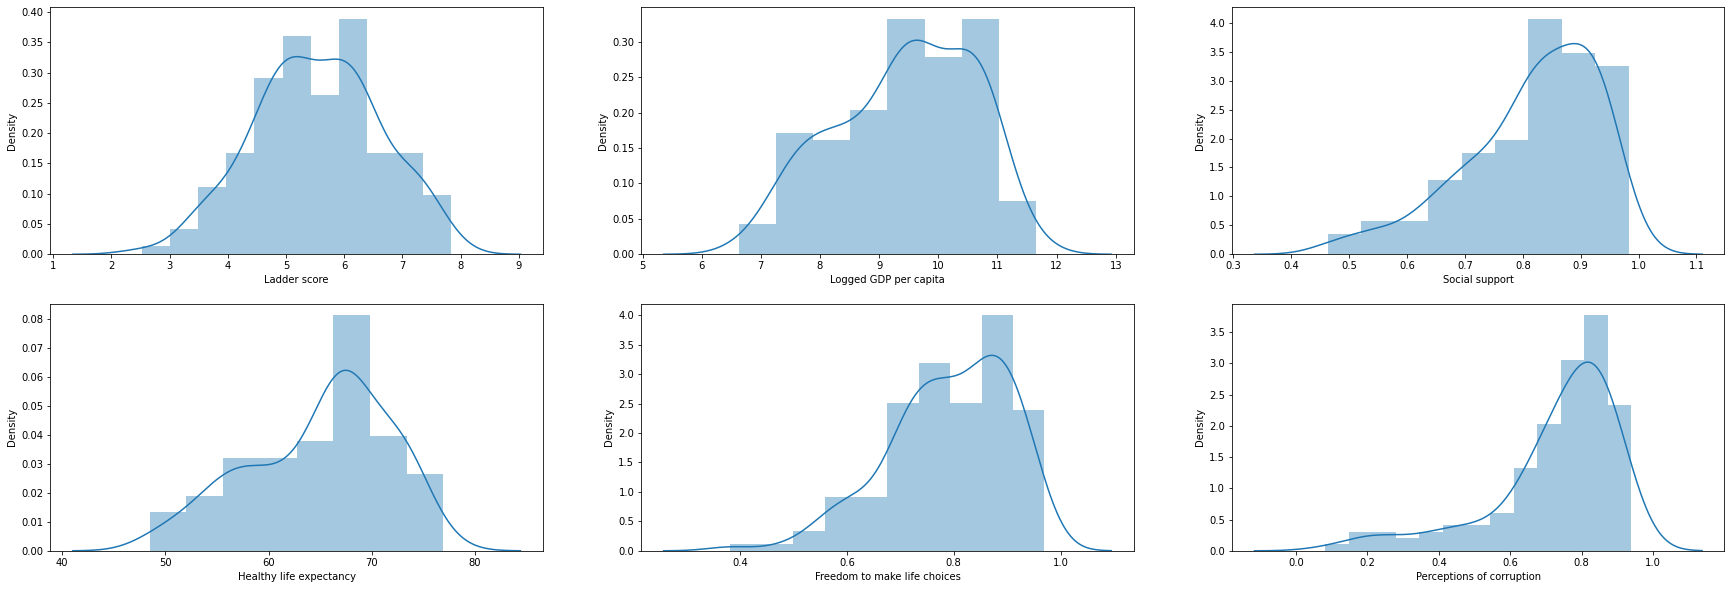

In [9]:
plt.figure(figsize = (30, 10))
plt.subplot(231)
sns.distplot(dataset['Ladder score'])
plt.subplot(232)
sns.distplot(dataset['Logged GDP per capita'])
plt.subplot(233)
sns.distplot(dataset['Social support'])
plt.subplot(234)
sns.distplot(dataset['Healthy life expectancy'])
plt.subplot(235)
sns.distplot(dataset['Freedom to make life choices'])
plt.subplot(236)
sns.distplot(dataset['Perceptions of corruption'])
plt.show()

# Basic BoxPlots

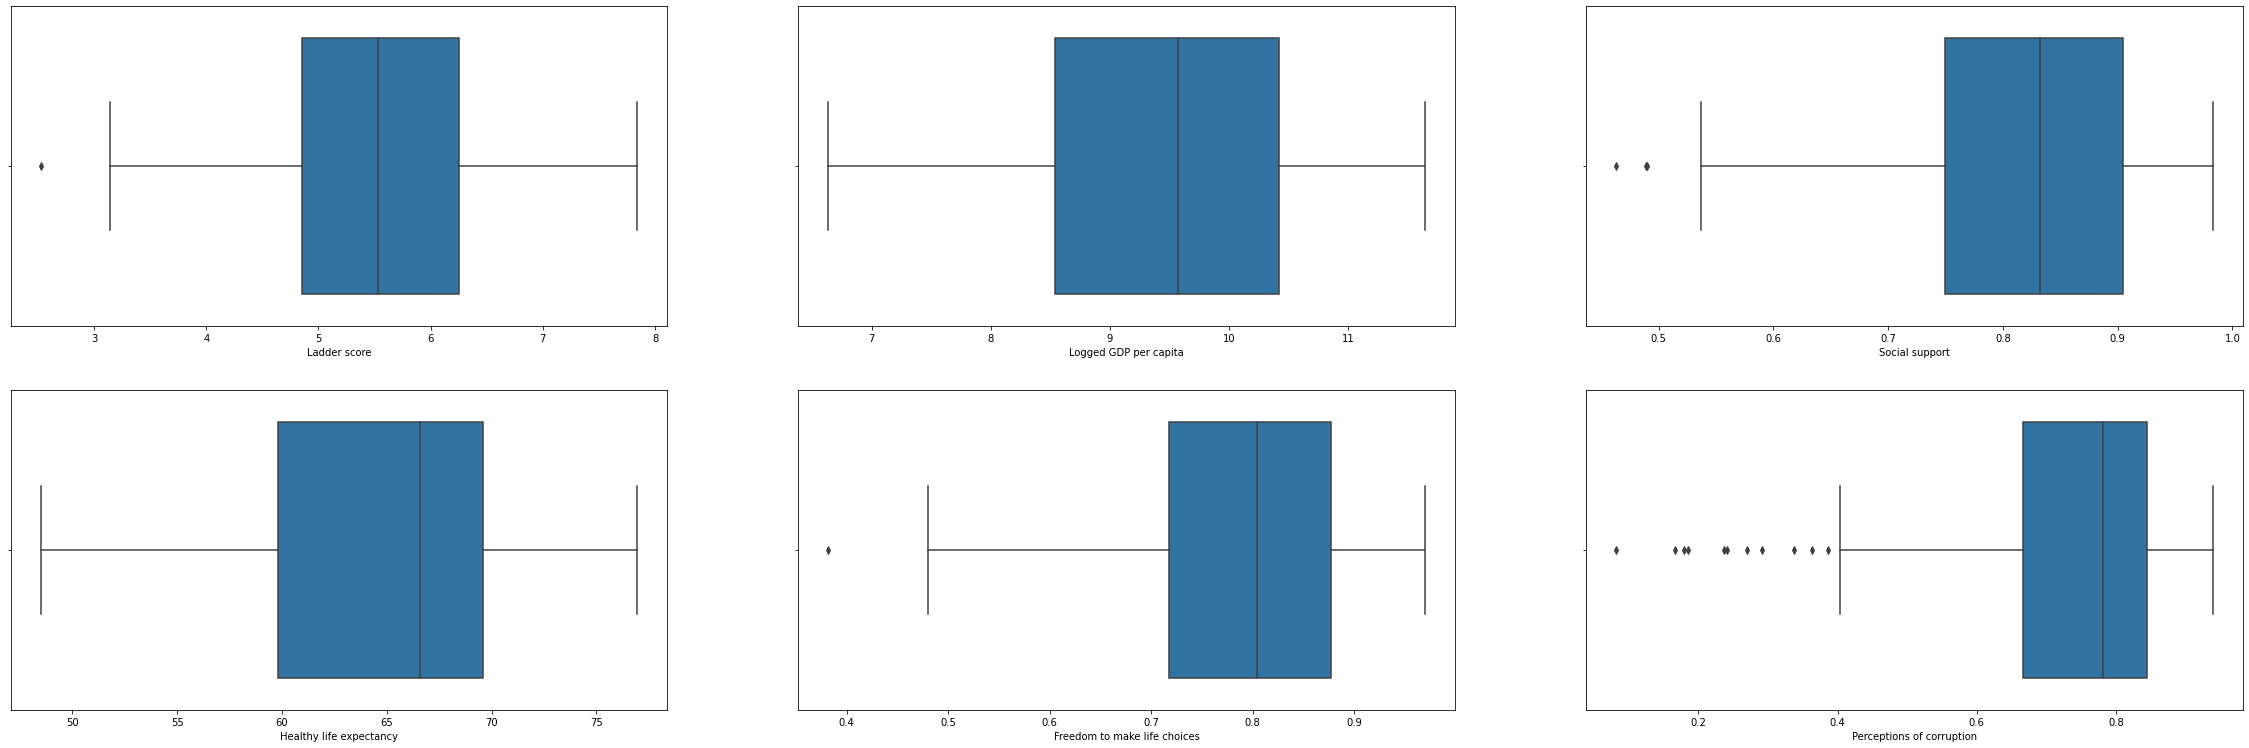

In [10]:
plt.figure(figsize = (40, 20))
plt.subplot(331)
sns.boxplot(dataset['Ladder score'])
plt.subplot(332)
sns.boxplot(dataset['Logged GDP per capita'])
plt.subplot(333)
sns.boxplot(dataset['Social support'])
plt.subplot(334)
sns.boxplot(dataset['Healthy life expectancy'])
plt.subplot(335)
sns.boxplot(dataset['Freedom to make life choices'])
plt.subplot(336)
sns.boxplot(dataset['Perceptions of corruption'])
plt.show()

# Sunburst depicting regions and countries

In [11]:
px.sunburst(
    dataset,
    names='Country name',
    parents='Regional indicator',
)

# Treemap depicting regions and countries on the basis of Healthy Life Expectancy

In [12]:
px.treemap(dataset, path=[px.Constant('world'), 'Regional indicator', 'Country name'], values='Logged GDP per capita',
                  color='Healthy life expectancy', hover_data=['Logged GDP per capita'])

# Scatter Plot showing Logged GDP per capita vs Healthy Life Expectancy, with a third parameter Social Support

In [13]:
px.scatter(dataset, x="Logged GDP per capita", y="Healthy life expectancy", size="Social support", color="Regional indicator",
           hover_name="Country name", log_x=True, size_max=10)

# Scatter Plot showing Freedom to make Life Choices vs Perceptions of Corruption, with a third parameter Social Support

In [14]:
px.scatter(dataset, x="Freedom to make life choices", y="Perceptions of corruption", size="Social support", color="Regional indicator",
           hover_name="Country name", log_x=True, size_max=10)

In [15]:
dataset['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

# Pie charts showing GDP per capita of each country, grouped by region

In [16]:
df = dataset['Regional indicator']=='Western Europe'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Western Europe')

In [17]:
df = dataset['Regional indicator']=='North America and ANZ'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of North America and ANZ')

In [18]:
df = dataset['Regional indicator']=='Middle East and North Africa'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Middle East and North Africa')

In [19]:
df = dataset['Regional indicator']=='Latin America and Caribbean'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Latin America and Caribbean')

In [20]:
df = dataset['Regional indicator']=='Central and Eastern Europe'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Central and Eastern Europe')

In [21]:
df = dataset['Regional indicator']=='East Asia'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='East Asia')

In [22]:
df = dataset['Regional indicator']=='Southeast Asia'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Southeast Asia')

In [23]:
df = dataset['Regional indicator']=='Commonwealth of Independent States'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Commonwealth of Independent States')

In [24]:
df = dataset['Regional indicator']=='Sub-Saharan Africa'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Sub-Saharan Africa')

In [25]:
df = dataset['Regional indicator']=='South Asia'
df = dataset[df]
px.pie(df, values='Logged GDP per capita', names='Country name', title='GDP per capita of Commonwealth of South Asia')

# Double Bar chart showing contrast between Perceptions of corruption and Explained by: Perceptions of corruption

In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Perceptions of corruption', y=dataset['Perceptions of corruption'], x=dataset['Country name']),
    go.Bar(name='Explained by: Perceptions of corruption', y=dataset['Explained by: Perceptions of corruption'], x=dataset['Country name'])
])
fig.update_layout(barmode='group')
fig.show()

# Double Bar chart showing contrast between Perceptions of corruption and Explained by: Perceptions of corruption, narrowed down to Western Europe

In [27]:
df = dataset['Regional indicator']=='Western Europe'
df = dataset[df]
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Perceptions of corruption', y=df['Perceptions of corruption'], x=df['Country name']),
    go.Bar(name='Explained by: Perceptions of corruption', y=df['Explained by: Perceptions of corruption'], x=df['Country name'])
])
fig.update_layout(barmode='group')
fig.show()

# Double bar chart showing Upper whisker vs Lower whisker

In [28]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Upper Whisker', y=dataset['upperwhisker'], x=dataset['Country name']),
    go.Bar(name='Lower Whisker', y=dataset['lowerwhisker'], x=dataset['Country name'])
])
fig.update_layout(barmode='group')
fig.show()

# Double bar chart showing Upper whisker vs Lower whisker, narrowed down to Western Europe

In [29]:
df = dataset['Regional indicator']=='Western Europe'
df = dataset[df]
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Upper Whisker', y=df['upperwhisker'], x=df['Country name']),
    go.Bar(name='Lower Whisker', y=df['lowerwhisker'], x=df['Country name'])
])
fig.update_layout(barmode='group')
fig.show()